# The Bootstrap

## Overview

In this section we introduce a commonly used data simulation technique. Specifically, 
we will see how to generate data samples from a sole sample. 
This technique is called <a href="https://en.wikipedia.org/wiki/Bootstrapping_(statistics)">bootstrap</a>. 
The boostrap was published by <a href="https://en.wikipedia.org/wiki/Bradley_Efron">Bradley Efron</a>  in 1979.
It is a mehod for computing standard errors and computing confidence intervals [2]. Overall, it is a resampling technique
and as such it can be used to estimate statistics on a population by sampling over a dataset with replacement or for constructing
approximate confidence intervals.

## Bootstrap

Bootstrap refers to a methodology whereby we use resampled data in order to perform statistical inference. 
Each resampled dataset is called a **bootstrap sample**. Furthermore, a **bootstrap replicate** is the value of the summary statistic computed from the bootstrap sample. Let's see how this can be done. 

Assume that we want to know some statistic of the general population under study. This could be the mean value or the median or any other 
statistic of interest. Let's assume that we are interested in the mean value. We know that an ubiased estimate of the population mean is the sample mean 
$\bar{x}$

$$\bar{x}=\frac{1}{n}\sum_i x_i$$

In this scenario, we also have an estimate for the standard error, $\hat{se}$ given by [2],

$$\hat{se} = \frac{\hat{\sigma}^2}{n}$$

Boostrap is not of a lot of help with this simple example, however in many cases variance estimation is not as easy as for the case of the mean.
This is where simulation and boostrap in particular step in. The idea behind boostrap is that we use resampling over the original dataset 
in order to estimate the quantity of interest.

### Sampling with replacement

Sampling with replacement is a procedure where we sample from a given dataset by replacing the sampled data value back in it. 
This means that when samplig with replacement, it is possible that a value will be selected multiple times. When we discussed sampling techniques, we saw
how to use Python and sample with replacement. In any case, this is illustrated below. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)
sns.set()

In [3]:
sample = np.random.normal(0.0, 1.0, size=30)
bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)

This is as simple as using ```replace=True```.  Now let's go back to the boostrap.

### Boostrap for the mean

Although we argued above that obtaining an estimate for the population mean is rather easy, let's use boostrap to do that. In the code
below, we obtain a sample of size $n=30$ from the normal distribution. Then we resaple a number of times over it.
For each boostrap sample, we compute the statistic of interest and store it in the ```means``` array.

In [4]:
sample = np.random.normal(0.0, 1.0, size=30)
means = []
for itr in range(10000):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    
    # compute the bootstrap replicate and
    # store it in the sample means array
    means.append(np.mean(bootstrap_sample))
 

Let's also plot the empirical distribution of the obtained estimates.

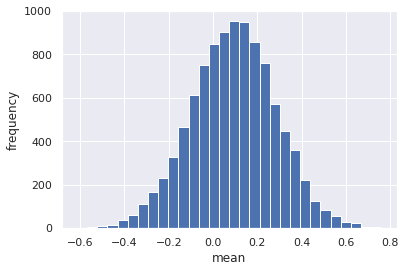

In [5]:
# Generate plot
_ = plt.hist(means, bins=30)

# Label the axes
_ = plt.xlabel("mean")
_ = plt.ylabel("frequency")


# Display the plot
plt.show()

We know that the population has mean zero but the obtained empirical distribution seems slighlty shifted. Increasing the sample size
should improve the situation. In any case, below we also compute the standard error.

In [6]:
se = np.sqrt(np.var(means)/float(len(means)))
f"Standard error for means={se}"
             

'Standard error for means=0.0019166307240398456'

However, obtaining a large sample sometimes is simply not possible. How can we obtain an estimate about the population mean? We can use sampling with replacement to compensate for the luck of data. This is easy with Python; use ```np.random.choice``` to sample with replacement from the original sample.

### Bootstrap confidence intervals

Previously, we saw how to use sampling with replacement and get an estimate of the needed statistic. We called this value the bootstrap replicate. Now the questions arises; how precise is the estimate we obtained? Recall that a confidence interval expresses precision.  In particular, a confidence interval expresses a range of plausible values for the population parameter we want to estimate.

There are several ways to construct boostrap confidence intervals [2].

- The normal interval
- Pivotal interval
- Boostrap percentile interval

For an estimator $\hat{\theta}$, the normal interval involves the boostrap estimate for the standard error and its given by

$$\hat{\theta} \pm z_{\alpha/2}\hat{se}_{boot}$$

This will be accurate as long as the distribution of  $\hat{\theta}$ follows the normal distribution [2].

The pivotal interval is defined as, [2],

$$(2\hat{\theta} - \hat{\theta^{*}_{1-\alpha/2}},2\hat{\theta} - \hat{\theta^{*}_{\alpha/2}})$$

where $\hat{\theta^{*}}$ is a boostrap replicate of $\hat{\theta}$.

The percentile interval is defined as, [2],

$$(\hat{\theta^{*}_{\alpha/2}}, \hat{\theta^{*}_{1-\alpha/2}})$$

Let's compute a $95\%$ confidence interval for the mean. We can do this using ```np.percentile``` as follows

In [29]:
print(f"95% confidence interval for the mean {np.percentile(sample_means, [2.5, 97.5])}")

95% confidence interval for the mean [-0.0622946   0.63267489]


## Summary

In this section we reviewed the bootstrap methodology. It allows us to generate samples from a given sample. We can use bootstrap when there is little data available in order to generate more data for us. Furthermore, it can be used to estimate population parameters by Monte Carlo simulations when it is too difficult to do it analytically. We will see the latter in the next section.

## References

1. <a href="https://en.wikipedia.org/wiki/Bootstrapping_(statistics)">Bootstrapping (statistics)</a>
2. Larry Wasserman, _All of Statistics. A Concise Course in Statistical Inference_, Springer 2003.